In [1]:
from sklearn import model_selection
from keras import datasets
import keras
assert keras.backend.image_data_format() == 'channels_last'
#from keraspp import aigen

Using TensorFlow backend.


In [2]:
from keras.preprocessing.image import ImageDataGenerator
from keraspp import aicnn

In [3]:
class Machine_Generator():
    def __init__(self, X, y, nb_classes=2, steps_per_epoch=10, fig=True, gen_param_dict=None):
        self.machine = aicnn.Machine(X, y, nb_classes=nb_classes, fig=fig)
        self.set_generator(steps_per_epoch=steps_per_epoch, gen_param_dict=gen_param_dict)
        
    def set_generator(self, steps_per_epoch=10, gen_param_dict=None):
        if gen_param_dict is not None:
            self.generator = ImageDataGenerator(**gen_param_dict)
        else:
            self.generator = ImageDataGenerator()
        
        print(self.machine.data.X_train.shape)
        self.generator.fit(self.machine.data.X_train, seed=0)
        self.steps_per_epoch = steps_per_epoch
    
    def fit(self, epochs=10, batch_size=64, verbose=1):
        model = self.machine.model
        data = self.machine.data
        generator = self.generator
        steps_per_epoch = self.machine.steps_per_epoch
        
        history = model.fit_generator(generator.flow(data.X_train, data.Y_train, batch_size=batch_size),
            epochs=epochs, steps_per_epoch=steps_per_epoch, validation_data=(data.X_test, data.Y_test))
        
        return history
                

In [4]:
class Machine(Machine_Generator):
    def __init__(self):
        #super(Machine, self).__init__()
        #super().__init__()
        (x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()
        _, X, _, y = model_selection.train_test_split(x_train, y_train, test_size=0.02)
        X = X.astype(float)
        gen_param_dict = {'rotation_range':10}
        super().__init__(X, y, nb_classes=10, gen_param_dict=gen_param_dict)


In [5]:
def main():
    m = Machine()
    m.machine.run()

(800, 32, 32, 3) (800, 1)
X_train shape: (800, 32, 32, 3)
800 train samples
200 test samples
data.input_shape (32, 32, 3)
(800, 32, 32, 3)
Train on 800 samples, validate on 200 samples
Epoch 1/100
800/800 [==============================] - 3s 4ms/step - loss: 2.3777 - accuracy: 0.1150 - val_loss: 2.2906 - val_accuracy: 0.1100
Epoch 2/100
800/800 [==============================] - 0s 206us/step - loss: 2.2807 - accuracy: 0.1363 - val_loss: 2.2592 - val_accuracy: 0.1750
Epoch 3/100
800/800 [==============================] - 0s 222us/step - loss: 2.2464 - accuracy: 0.1513 - val_loss: 2.3001 - val_accuracy: 0.1450
Epoch 4/100
800/800 [==============================] - 0s 225us/step - loss: 2.2457 - accuracy: 0.1575 - val_loss: 2.2797 - val_accuracy: 0.1200
Epoch 5/100
800/800 [==============================] - 0s 219us/step - loss: 2.2473 - accuracy: 0.1550 - val_loss: 2.1740 - val_accuracy: 0.2350
Epoch 6/100
800/800 [==============================] - 0s 217us/step - loss: 2.1789 - accura

Epoch 56/100
800/800 [==============================] - 0s 210us/step - loss: 0.0843 - accuracy: 0.9775 - val_loss: 2.7385 - val_accuracy: 0.4200
Epoch 57/100
800/800 [==============================] - 0s 221us/step - loss: 0.0613 - accuracy: 0.9887 - val_loss: 2.8846 - val_accuracy: 0.4150
Epoch 58/100
800/800 [==============================] - 0s 221us/step - loss: 0.1169 - accuracy: 0.9712 - val_loss: 2.9119 - val_accuracy: 0.3900
Epoch 59/100
800/800 [==============================] - 0s 211us/step - loss: 0.1137 - accuracy: 0.9700 - val_loss: 2.8668 - val_accuracy: 0.4200
Epoch 60/100
800/800 [==============================] - 0s 200us/step - loss: 0.0682 - accuracy: 0.9887 - val_loss: 2.9276 - val_accuracy: 0.4450
Epoch 61/100
800/800 [==============================] - 0s 203us/step - loss: 0.0540 - accuracy: 0.9862 - val_loss: 2.9811 - val_accuracy: 0.4300
Epoch 62/100
800/800 [==============================] - 0s 199us/step - loss: 0.0519 - accuracy: 0.9862 - val_loss: 3.0114 -

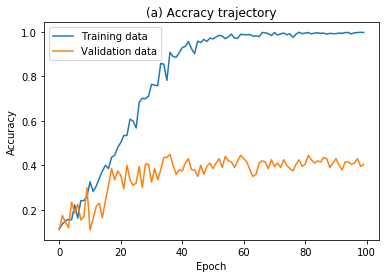

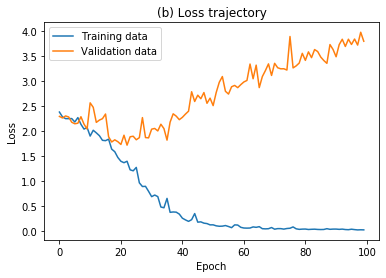

In [6]:
main()

In [7]:
import tensorflow as tf
print(tf.__version__)
print(keras.__version__)


2.1.0
2.3.1


In [8]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 15390184121011420332
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 2742948125776319753
physical_device_desc: "device: XLA_CPU device"
, name: "/device:XLA_GPU:0"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 12575674536392408678
physical_device_desc: "device: XLA_GPU device"
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 3604021248
locality {
  bus_id: 1
  links {
  }
}
incarnation: 12577078078913872379
physical_device_desc: "device: 0, name: GeForce GTX 1050, pci bus id: 0000:01:00.0, compute capability: 6.1"
]
